<a href="https://colab.research.google.com/github/Nardy07/NIDS/blob/main/copied.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing required libraries
import numpy as np
import pandas as pd
from sklearn.calibration import LabelEncoder
import tensorflow as tf
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential,save_model
from keras.layers import LSTM, Dense, Dropout,Embedding, SpatialDropout1D
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from sklearn.utils import class_weight

In [ ]:
data = pd.read_csv('X_try2.csv')
labels = pd.read_csv('Y_try2.csv')

In [ ]:
data

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,Fwd_Pkt_Len_Mean,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Mean,Bwd_IAT_Tot,...,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,SYN_Flag_Cnt,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Subflow_Fwd_Byts,Subflow_Bwd_Byts,Init_Bwd_Win_Byts
0,0.001221,0.703154,0.352941,0.000666,0.000176,9.493671e-07,0.000311,0.000467,0.000189,0.000666,...,0.000467,0.000297,0.000387,1.498197e-07,0.0,0.000280,0.000311,9.504153e-07,2.792203e-07,0.000977
1,0.000000,0.000000,0.000000,0.000003,0.000029,0.000000e+00,0.000000,0.000000,0.000000,0.000003,...,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
2,0.817852,0.007263,0.352941,0.126229,0.000264,6.582278e-05,0.008095,0.027117,0.008429,0.125834,...,0.027117,0.011442,0.016427,2.697201e-04,1.0,0.010352,0.008095,6.589546e-05,1.777703e-05,0.980240
3,0.006762,0.606446,0.352941,0.000197,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000001,...,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.980240
4,0.000000,0.000000,0.000000,0.000001,0.000029,0.000000e+00,0.000000,0.000000,0.000000,0.000001,...,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203705,0.000000,0.000000,0.000000,0.000001,0.000029,0.000000e+00,0.000000,0.000000,0.000000,0.000001,...,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
203706,0.000000,0.000000,0.000000,0.000001,0.000029,0.000000e+00,0.000000,0.000000,0.000000,0.000001,...,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
203707,0.000000,0.000000,0.000000,0.000001,0.000029,0.000000e+00,0.000000,0.000000,0.000000,0.000001,...,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
203708,0.531106,0.076839,0.352941,0.000001,0.000029,0.000000e+00,0.000000,0.000000,0.000000,0.000001,...,0.000000,0.000000,0.000000,0.000000e+00,1.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000015


In [ ]:
# Define the maximum sequence length and vocabulary size
maxlen = 25  # or any appropriate value
max_features = 400  # or any appropriate value

In [ ]:
# Define the embedding dimension
embed_dim = 300

In [ ]:
model = Sequential()
model.add(Embedding(max_features, output_dim=embed_dim, input_length=maxlen, trainable=False))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25))
model.add(LSTM(units=64 , recurrent_dropout = 0.2 , dropout = 0.2))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01), loss='categorical_crossentropy', metrics=['accuracy'])

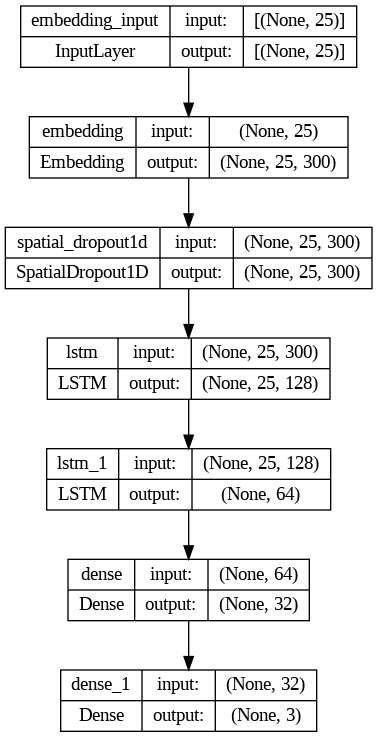

In [ ]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
y = labels['Label'].values
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
#converting labels to one hot encoded format
num_classes = 3
y = to_categorical(y,num_classes=num_classes)

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(data)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [ ]:
#X_train = X_train.reshape((X_train.shape[0],1, X_train.shape[1]))
#X_test = X_test.reshape((X_test.shape[0],1, X_test.shape[1]))

In [ ]:
X_train.shape

(162968, 25)

In [ ]:
batch_size = 256
epochs = 15

In [ ]:
history = model.fit(X_train, y_train, batch_size = batch_size , validation_data = (X_test,y_test) , epochs = epochs)

Epoch 1/5
637/637 [==============================] - 339s 522ms/step - loss: 0.7827 - accuracy: 0.6338 - val_loss: 0.7533 - val_accuracy: 0.6538
Epoch 2/5
637/637 [==============================] - 346s 544ms/step - loss: 0.7503 - accuracy: 0.6562 - val_loss: 0.7516 - val_accuracy: 0.6538
Epoch 3/5
637/637 [==============================] - 338s 531ms/step - loss: 0.7509 - accuracy: 0.6558 - val_loss: 0.7537 - val_accuracy: 0.6538
Epoch 4/5
637/637 [==============================] - 332s 522ms/step - loss: 0.7499 - accuracy: 0.6561 - val_loss: 0.7515 - val_accuracy: 0.6538
Epoch 5/5
365/637 [================>.............] - ETA: 2:13 - loss: 0.7509 - accuracy: 0.6548

In [ ]:
print("Accuracy of the model on Training Data is - " , model.evaluate(X_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

5093/5093 [==============================] - 110s 22ms/step - loss: 0.0235 - accuracy: 0.9956
Accuracy of the model on Training Data is -  99.56187605857849 %
1274/1274 [==============================] - 29s 23ms/step - loss: 0.0223 - accuracy: 0.9959
Accuracy of the model on Testing Data is -  99.59010481834412 %


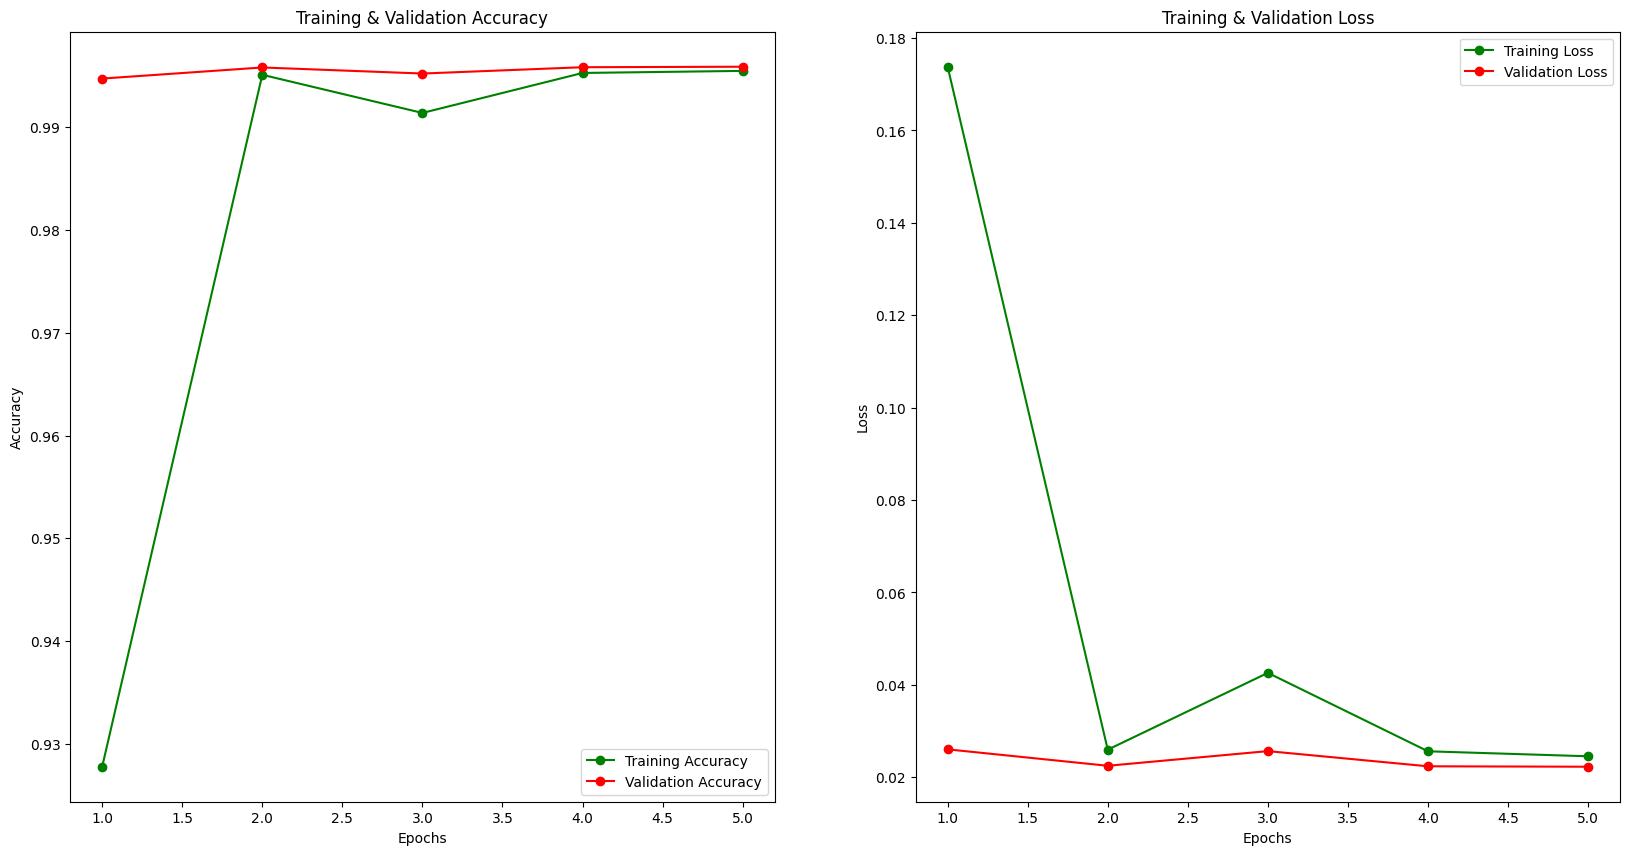

In [ ]:
import matplotlib.pyplot as plt
epochs = [i for i in range(1,6)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Validation Loss')
ax[1].set_title('Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

1274/1274 [==============================] - 27s 21ms/step


In [ ]:
print(classification_report(y_test, y_pred,zero_division='warn'))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14706
           1       1.00      0.99      1.00     13685
           2       0.99      1.00      0.99     12351

   micro avg       1.00      1.00      1.00     40742
   macro avg       1.00      1.00      1.00     40742
weighted avg       1.00      1.00      1.00     40742
 samples avg       1.00      1.00      1.00     40742



In [ ]:
y_test_labels1 = y_test.argmax(axis=1)
y_true_encoded = le.fit_transform(y_test_labels1)

In [ ]:
y_pred_labels = np.argmax(y_pred,axis=1)

In [ ]:
confusion_mat = confusion_matrix(y_true_encoded, y_pred_labels)

In [ ]:
confusion_mat

array([[14664,     2,    40],
       [   15, 13563,   107],
       [    0,     3, 12348]])

In [ ]:
logr_bin_df = pd.DataFrame({'Actual': y_true_encoded, 'Predicted': y_pred_labels})
print(logr_bin_df)

       Actual  Predicted
0           1          1
1           0          0
2           1          1
3           2          2
4           0          0
...       ...        ...
40737       0          0
40738       2          2
40739       1          1
40740       0          0
40741       0          0

[40742 rows x 2 columns]


In [ ]:
from keras.models import save_model

# Assuming 'model' is your trained Keras model
model.save('final_model.h5')  # Save the model in HDF5 format

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
